### Requirements: 3 Steps to gathering data:
The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [2]:
#Import libraries
import pandas as pd
import tweepy
import numpy as np
import requests
import os
import json
import time
from pprint import pprint

# Code timer:
'''t = time.process_time()
#do some stuff
elapsed_time = time.process_time() - t'''

def get_real_types(df):
    '''Input a pandas dataframe and get back a dictionary showing the 
    actual data types of each column - instead of <object> pointers.
    ** make sure you include from pprint import pprint
    
    '''

    # Create empty dictionary:
    types_list = {}
    # Create a list of the columns in df
    columns_list = df.columns.tolist()
    
    # For loop creates a key-value pair in the types_list dict with column name and the
    # data type of the value in the first row for that column

    for i in columns_list:
        types_list[i] = type(df[i].iloc[0])

    pprint(types_list)

    return(types_list)

# Connect my to my twitter account:
Note - I changed this to a markdown cell so I could delete my keys and tokens.

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#Testing it's hooked up:
'''public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)'''

#### Import the supplied Twitter archive file

In [3]:
# Do this last - it's easy. Don't forget to create a copy.
tweets_orig = pd.read_csv('twitter-archive-enhanced.csv')
tweets_orig.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Programmatic download of image prediction file:

In [4]:
# Download the file to my folder:
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#r = requests.get(url, allow_redirects=True)
#open('image-predictions.tsv', 'wb').write(r.content)

In [5]:
# Import image-predictions.tsv to a dataframe:
ip_orig = pd.read_csv('image-predictions.tsv', sep = '\t')
ip_orig.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# Create a backup csv in case:
ip_orig.to_csv('image-predictions.csv')

#### Get additional tweet attributes from Twitter using tweepy:
For each tweet in the csv file, get at least: tweet ID, retweet count, and favorite count.
Store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum)

First, I need to do a little exploring:
How to create a request for a tweet by id and what does the result look like?

In [7]:
# create the list of tweets needed:
twt_ids = list(tweets_orig['tweet_id'])

In [92]:
# Create json file, convert to list, and load into dataframe
not_found = []
with open(os.path.join(os.getcwd(), 'tweet_json.txt'), mode = 'w') as file:
    for twt_id in twt_ids:
        try:
            tweet = api.get_status(twt_id, tweet_mode = 'extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            tweet_json = json.dumps(tweet._json)
            file.write(tweet_json + '\n')
        except:
            print('Tweet id was not found')
            not_found.append(twt_id)

print("Finished dumping tweets")

Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found
Tweet id was not found


Rate limit reached. Sleeping for: 529
Rate limit reached. Sleeping for: 538


Finished dumping tweets


In [8]:
#Create a list of full tweets from the text file
full_tweets = []
for line in open('tweet_json.txt', 'r'):
    full_tweets.append(json.loads(line))
    

In [9]:
# Testing code - how to extract just the fields I want in a dataframe
cur_twt = full_tweets[0]
cur_twt['id_str']

'892420643555336193'

In [10]:
# Loop to create a list of dicts to extract just the fields I want in a dataframe
tweets_ext = []
for i in range(len(full_tweets)):
    cur_twt = full_tweets[i]
    d = {'tweet_id': cur_twt['id_str'], 
        'retweet_count': cur_twt['retweet_count'], 
        'favorite_count': cur_twt['favorite_count'], 
        }
    tweets_ext.append(d)
# Create a dataframe from the list of dicts:      
extended_tweets = pd.DataFrame(tweets_ext)
#extended_tweets.head()

In [115]:
# create a backup csv file in case 
#extended_tweets.to_csv('extended_tweets.csv')


### Assessment (Iteration 1):
Now we have the three datasets gathered! Now we can start assessing them and also creating a single dataframe.
Once the single dataframe is created, we will likely want to take another pass at assessement before we start cleaning, as the merged dataframe may have new issues.

In [11]:
# create copies of the dataframes to work on:
tweets = tweets_orig.copy()
ip = ip_orig.copy()
extended_tweets_orig = extended_tweets.copy()

In [12]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
extended_tweets.info()
# need to find out what the data type of tweet id is:
get_real_types(extended_tweets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
tweet_id          2345 non-null object
dtypes: int64(2), object(1)
memory usage: 55.0+ KB
{'favorite_count': <class 'numpy.int64'>,
 'retweet_count': <class 'numpy.int64'>,
 'tweet_id': <class 'str'>}


{'favorite_count': numpy.int64, 'retweet_count': numpy.int64, 'tweet_id': str}

In [14]:
get_real_types(tweets)

{'doggo': <class 'str'>,
 'expanded_urls': <class 'str'>,
 'floofer': <class 'str'>,
 'in_reply_to_status_id': <class 'numpy.float64'>,
 'in_reply_to_user_id': <class 'numpy.float64'>,
 'name': <class 'str'>,
 'pupper': <class 'str'>,
 'puppo': <class 'str'>,
 'rating_denominator': <class 'numpy.int64'>,
 'rating_numerator': <class 'numpy.int64'>,
 'retweeted_status_id': <class 'numpy.float64'>,
 'retweeted_status_timestamp': <class 'float'>,
 'retweeted_status_user_id': <class 'numpy.float64'>,
 'source': <class 'str'>,
 'text': <class 'str'>,
 'timestamp': <class 'str'>,
 'tweet_id': <class 'numpy.int64'>}


{'doggo': str,
 'expanded_urls': str,
 'floofer': str,
 'in_reply_to_status_id': numpy.float64,
 'in_reply_to_user_id': numpy.float64,
 'name': str,
 'pupper': str,
 'puppo': str,
 'rating_denominator': numpy.int64,
 'rating_numerator': numpy.int64,
 'retweeted_status_id': numpy.float64,
 'retweeted_status_timestamp': float,
 'retweeted_status_user_id': numpy.float64,
 'source': str,
 'text': str,
 'timestamp': str,
 'tweet_id': numpy.int64}

In [15]:
# Is the denominator always 10?
tweets['rating_denominator'].nunique()
# No, it isn't... so we'll keep this column

18

In [16]:
tweets.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
extended_tweets.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

In [18]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
get_real_types(ip)

{'img_num': <class 'numpy.int64'>,
 'jpg_url': <class 'str'>,
 'p1': <class 'str'>,
 'p1_conf': <class 'numpy.float64'>,
 'p1_dog': <class 'numpy.bool_'>,
 'p2': <class 'str'>,
 'p2_conf': <class 'numpy.float64'>,
 'p2_dog': <class 'numpy.bool_'>,
 'p3': <class 'str'>,
 'p3_conf': <class 'numpy.float64'>,
 'p3_dog': <class 'numpy.bool_'>,
 'tweet_id': <class 'numpy.int64'>}


{'img_num': numpy.int64,
 'jpg_url': str,
 'p1': str,
 'p1_conf': numpy.float64,
 'p1_dog': numpy.bool_,
 'p2': str,
 'p2_conf': numpy.float64,
 'p2_dog': numpy.bool_,
 'p3': str,
 'p3_conf': numpy.float64,
 'p3_dog': numpy.bool_,
 'tweet_id': numpy.int64}

In [20]:
ip.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Assessment Task List:
#### Quality Issues:
##### In Tweets archive:
[x]There are retweets: any rows that have a non-null value in retweeted_status_id should be removed

[x]Once that is done, we should remove the retweet columns, as we won’t need them anymore - we can drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

[x]There are replies: any rows that have non-null value in in_reply_to_status_id should be removed

[x]Once that is done, we should remove the reply_to columns - we can drop in_reply_to_status_id and in_reply_to_user_id

[x]tweet_id field is not currently a string - we should change it to a string

[x]'timestamp': is a string - it should be date/time, we need to convert it

[x]There are tweets that are not dog ratings - the name column offers a pretty good hint - the tweets where name doesn’t start with a capital letter seems to be a good indicator of which tweets we could take out.

[x]There are also a bunch of tweets that are requests to not send in photos of things other than dogs - many contain ‘we only rate dogs’ - so we can fix that too.

##### Image Prediction:
[x]The tweet_id column is type int - we will convert to a string

#### Tidiness Issues:
##### Tweets archive:
[x]‘doggo’, puppo and pupper are values, not variables. We should create a dog_type column and eliminate the individual columns (pupper is a puppy, puppo is middle-age, doggo is older dog).

[x]The source field isn’t useful - it’s the same for nearly every record and doesn’t contain particularly interesting data - we can get rid of it

[x]Creating one dataset will make analysis easier 

##### Image Prediction:

[x]The way the probabilities are expressed is suboptimal - a single variable is spread out to two columns instead of just expressing the probability that the image shows a dog, each probability has two columns - p dog (true if the probability predicts that the image is a dog and false if not). We could just modify the probability columns to always predict the likelihood of the image being a dog. So for the case where p dog is true, leave the value as is, where p dog is false, we convert the probability to 1- probability.

Original list is in EVERNOTE: https://www.evernote.com/l/AAXDPGtZASdKDooEW6HQb8nURYlXvk23EYQ


In [21]:
# Convert the tweet_id column data types to str
tweets['tweet_id'] = tweets['tweet_id'].astype(str)
ip['tweet_id'] = ip['tweet_id'].astype(str)

# Test - note: this worked fine, I commented it out to save space.
'''get_real_types(tweets)
get_real_types(extended_tweets)
get_real_types(ip)'''

'get_real_types(tweets)\nget_real_types(extended_tweets)\nget_real_types(ip)'

In [30]:
# 'timestamp': <class 'str’> - it should be date/time
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])

# Test - note: this worked, I commented it out to save space.
#get_real_types(tweets)

In [31]:
# remove the replies from the dataset by selecting only records with in_reply_to_status_id is null: 

tweets = tweets[tweets['in_reply_to_status_id'].isnull()]

# Test - we expect the numer of records to be 2278 as there are 2356 records of which 78 are replies
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

In [32]:
# remove the retweets from the dataset by selecting only records with retweeted_status_timestamp is null:
tweets = tweets[tweets['retweeted_status_timestamp'].isnull()]

# Test - we expect the number of records to be 2097 as there are 181 retweets
tweets.info()
# Remove the irrelevant columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

In [33]:
# Remove the irrelevant columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 

In [34]:
# create a list of columns to drop
todrop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ]

#Note - line below is commented out - it can only be run once then subsequently throws an error
#tester = tweets.drop(todrop, axis = 1, inplace=False)

# Test - we expect to see the total columns to be 12 and the desired columns are gone:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

In [35]:
# Create one dataframe joining the tweets df with extended_tweets and ip
step_1 = pd.merge(tweets, extended_tweets, how = 'left', on = 'tweet_id')

# Test:
step_1.info()
# This is great! It looks like we got favorite counts and retweet counts for all 2097 tweets in our main dataframe!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 19 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
favorite_count                2

In [36]:
step_2 = pd.merge(step_1, ip, how = 'left', on = 'tweet_id')
#test:
step_2.info()
# Our luck ran out a bit - there are 2075 image prediction records, but only 1971 of them matched to tweets in our original data!
# We need to keep this in mind when doing an analysis - we have tweets with no prediction.

# Let's create a dataset that only contains the rows with image predictions. If we look at this account's twitter feed
# Some of the tweets aren't dog ratings, so it would make sense that we don't have an image prediction for each tweet.
step_3 = pd.merge(step_1, ip, how = 'inner', on = 'tweet_id')
#test:
step_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 30 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
favorite_count                2

In [37]:
# Let's create a backup here just in case!
tweets_master = step_2.copy()
tweets_i_master = step_3.copy()

In [38]:
# Create a csv backup as well:
# Note, code works, but is commented out so it doesn't get re-run accidentally
tweets_master.to_csv('tweets_master.csv', index = False)
tweets_i_master.to_csv('tweets_i_master.csv', index = False)

### Cleaning:
NOTE - NEED TO COPY THE FULL LIST HERE - RIGHT NOW IT'S IN EVERNOTE: https://www.evernote.com/l/AAXDPGtZASdKDooEW6HQb8nURYlXvk23EYQ

In [39]:
# Let's re-import the tweets_i_master dataframe and make a copy to clean:
temp = pd.read_csv('tweets_i_master.csv')
tweets_clean = temp.copy()
tweets_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 30 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
favorite_count                1971 non-

In [40]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 30 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
favorite_count                1971 non-

In [41]:
# create the column to hold the dog type value:
tweets_clean['dog_type'] = 'Not_Defined'

In [437]:
i = 0
for i in range(len(tweets_clean['dog_type'])):
    dt = ''
    if tweets_clean['doggo'][i] == 'doggo':
        dt = 'doggo'
    elif tweets_clean['pupper'][i] == 'pupper':
        dt = 'pupper'
    elif tweets_clean['puppo'][i] == 'puppo':
        dt = 'puppo'
    else:
        dt = 'None'
        
    tweets_clean['dog_type'][i] = dt
    #print(dt)

/Users/LauranH/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [42]:
# Test:
tweets_clean.dog_type.value_counts()

Not_Defined    1971
Name: dog_type, dtype: int64

In [43]:
# Now we can drop the columns we used to derive the dog_type column:
# We should also drop the source column - it contains the same value for nearly every row and doesn't tell us much:

tweets_clean.drop(columns = ['pupper', 'doggo', 'puppo', 'source'], inplace=True)

# Test
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 27 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
floofer                       1971 non-null object
favorite_count                1971 non-null int64
retweet_count                 1971 non-null int64
jpg_url                       1971 non-null object
img_num                       1971 non-null int64
p1                            1971 non-nul

In [44]:
# Now would be a good time to back up the data frame to a csv:
tweets_clean.to_csv('tweets_clean.csv', index=False)

In [45]:
tweets_clean = pd.read_csv('tweets_clean.csv')

In [46]:
# Let's do some basic quality improvement by removing tweets that are easily identified as NOT dog ratings:

# The tweets that start with a capital letter are not usually dog ratings.
tweets_clean = tweets_clean[tweets_clean['name'].str.istitle()]

# Look at the rows that contain "we only rate dogs" or similar - these are not dog ratings!
not_dogs = tweets_clean[tweets_clean['text'].str.contains("only rate")]
tweets_clean = tweets_clean.drop(not_dogs.index, axis = 0)
# Test:
tweets_clean.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1833 entries, 0 to 1970
Data columns (total 27 columns):
tweet_id                      1833 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1833 non-null object
text                          1833 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1833 non-null object
rating_numerator              1833 non-null int64
rating_denominator            1833 non-null int64
name                          1833 non-null object
floofer                       1833 non-null object
favorite_count                1833 non-null int64
retweet_count                 1833 non-null int64
jpg_url                       1833 non-null object
img_num                       1833 non-null int64
p1                            1833 non-nul

In [47]:
# Now let's fix the probabilities by combining p1_conf and p1_dog, p2_conf and p2_dog and p3_conf and p3_dog:
# We'll create functions to use to create the single variable - if p1_dog = True then p1_prob = p1_conf, if it's false, p1_prob = 1-p1_conf:

def real_prob(row):

    conf = row['p1_conf']
    if row['p1_dog'] == False:
        x = 1 - conf
    else:
        x = conf
        
    return(x)

def real_prob2(row):
    conf2 = row['p2_conf']
    if row['p2_dog'] == False:
        x2 = 1 - conf2
    else:
        x2 = conf2
        
    return(x2)

def real_prob3(row):
    conf3 = row['p3_conf']
    if row['p3_dog'] == False:
        x3 = 1 - conf3
    else:
        x3 = conf3
        
    return(x3)


In [48]:
#create the 3 new probability columns:

tweets_clean['p1_probability_of_dog'] = tweets_clean.apply (lambda row: real_prob (row),axis=1)
tweets_clean['p2_probability_of_dog'] = tweets_clean.apply (lambda row: real_prob2 (row),axis=1)
tweets_clean['p3_probability_of_dog'] = tweets_clean.apply (lambda row: real_prob3 (row),axis=1)

# test:
tweets_clean.head(40)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,p1_probability_of_dog,p2_probability_of_dog,p3_probability_of_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,bagel,0.085851,False,banana,0.076110,False,Not_Defined,0.902951,0.914149,0.923890
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,Pekinese,0.090647,True,papillon,0.068957,True,Not_Defined,0.323581,0.090647,0.068957
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,malamute,0.078253,True,kelpie,0.031379,True,Not_Defined,0.716012,0.078253,0.031379
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,Not_Defined,0.829722,0.168086,0.959164
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Not_Defined,0.555712,0.225770,0.175219
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Not_Defined,0.425595,0.116317,0.923098
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,...,Border_collie,0.199287,True,ice_lolly,0.193548,False,Not_Defined,0.341703,0.199287,0.806452
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,Not_Defined,0.566142,0.178406,0.076507
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,...,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,Not_Defined,0.487574,0.193054,0.118184
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,Not_Defined,0.511319,0.451038,0.029248


In [49]:
# Remove the columns we no longer need:
not_needed = ['p1_conf', 'p2_conf', 'p3_conf']
tweets_clean.drop(columns = not_needed, inplace = True)

#Test:
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1,p1_dog,p2,p2_dog,p3,p3_dog,dog_type,p1_probability_of_dog,p2_probability_of_dog,p3_probability_of_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,orange,False,bagel,False,banana,False,Not_Defined,0.902951,0.914149,0.923890
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,Chihuahua,True,Pekinese,True,papillon,True,Not_Defined,0.323581,0.090647,0.068957
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,Chihuahua,True,malamute,True,kelpie,True,Not_Defined,0.716012,0.078253,0.031379
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,paper_towel,False,Labrador_retriever,True,spatula,False,Not_Defined,0.829722,0.168086,0.959164
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,basset,True,English_springer,True,German_short-haired_pointer,True,Not_Defined,0.555712,0.225770,0.175219


In [50]:
# Create final csv backup of cleaned and tidied data!
tweets_clean.to_csv('tweets_clean_final.csv', index = False)

## Analysis and Visualization
Some questions I'd like to look at in this data:
1. How many of the image predictions actually predict objects other than dogs?
2. Of the images that are judged to be dogs, what's the distribution of breeds? Is every known dog breed represented?
3. What are the most common dog names?
4. Of the images that are judged not to be dogs, what objects are they judged to be?
5. How many times is the algorithm wrong at a P1 level? i.e. how many times do we have records that do appear to be dogs (e.g. have a name), but the P1 value is False?
6. Is the average rating different based on dog life phase (dog_type)?
7. Is there such thing as a "harundackle"?


In [51]:
# Import and functions:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#How many of the image predictions actually predict objects other than dogs?
tweets_clean['p1_dog'].value_counts()

True     1361
False     472
Name: p1_dog, dtype: int64

In [53]:
# Distribution of Breeds:
tweets_clean[tweets_clean['p1_dog'] == True]['p1'].value_counts()

golden_retriever                  131
Labrador_retriever                 87
Pembroke                           82
Chihuahua                          75
pug                                49
Pomeranian                         36
chow                               36
Samoyed                            34
toy_poodle                         33
malamute                           28
French_bulldog                     24
cocker_spaniel                     24
Chesapeake_Bay_retriever           22
miniature_pinscher                 21
Staffordshire_bullterrier          19
Siberian_husky                     19
Eskimo_dog                         18
German_shepherd                    18
beagle                             17
Maltese_dog                        17
Shih-Tzu                           17
Cardigan                           17
Rottweiler                         16
Shetland_sheepdog                  15
Lakeland_terrier                   15
Italian_greyhound                  13
Pekinese    

In [54]:
# How many dog breeds are represented?
tweets_clean[tweets_clean['p1_dog'] == True]['p1'].nunique()
# According to American Kennel Club, there are more than 170 breeds, so some are missing.

111

In [55]:
# P1 misses:
tweets_clean[tweets_clean['p1_dog'] == False]['name'].value_counts()
# P2 misses:
tweets_clean[tweets_clean['p1_dog'] == False][tweets_clean['p2_dog'] == False]['name'].value_counts()


/Users/LauranH/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


None        136
Steven        3
Jerry         3
Keith         2
Patrick       2
Gerald        2
Mia           2
Samson        2
Phil          2
Milo          2
Charles       2
Albus         2
Gary          2
Bailey        2
Phineas       2
Herm          2
Buddy         2
Hammond       2
Derek         2
Chip          2
Elliot        2
Clarence      2
Belle         1
Brad          1
Chet          1
Amélie        1
Tess          1
Tango         1
Nala          1
Zoey          1
           ... 
Randall       1
Penelope      1
Champ         1
Cedrick       1
Doug          1
Oliver        1
Caryl         1
Doc           1
Fido          1
Jangle        1
Meera         1
Bobby         1
Hazel         1
Lucy          1
Sonny         1
Maxwell       1
Moose         1
Winston       1
Calvin        1
Daniel        1
Opal          1
Ricky         1
Carter        1
Shaggy        1
Edd           1
Mary          1
Rumpole       1
Julius        1
Kevin         1
Rodman        1
Name: name, Length: 180,

In [56]:
tweets_clean_subset = tweets_clean[tweets_clean['p1_dog']==True][['tweet_id', 'rating_numerator', 
                                                 'name', 'favorite_count', 'retweet_count', 'p1', 'p1_dog']]

In [59]:
# Which dog breeds get the highest ratings? Which get the most favorites and retweets?
data = pd.DataFrame(tweets_clean_subset.groupby(by = ['p1'])['favorite_count', 'retweet_count'].mean()).sort_values('favorite_count',ascending=False)
data.head()
#data.sort_values('favorite_count',ascending=False)


In [61]:
# Let's plot the top 50 most favorited dog breeds & 50 most retweeted dog breeds:
# Syntax: df.nlargest(3, 'a')
df_fav = data.nlargest(49, 'favorite_count')
df_ret = data.nlargest(49, 'retweet_count')
df_fav.head()
#plt.scatter(df_fav['p1'], df_fav['favorite_count'])
#plt.show()
#data.nlargest(49,'favorite_count').plot.bar()

,favorite_count,retweet_count
p1,,
black-and-tan_coonhound,33204.000000,7980.0
Saluki,23618.250000,4974.5
French_bulldog,19093.708333,4939.5
standard_poodle,17270.333333,7300.5
English_springer,17175.625000,6524.5


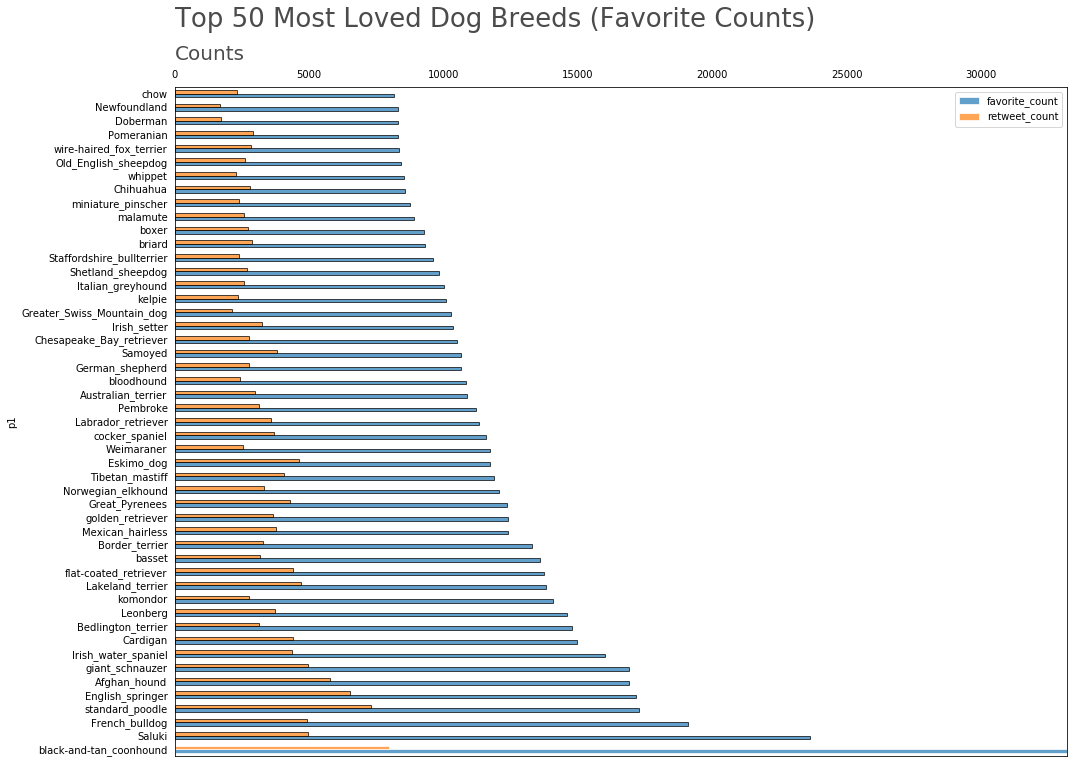

In [62]:
# Plot the Favorite Counts and Retweet Counts for top 50 most Favorited breeds:
# Create a figure of given size
fig = plt.figure(figsize=(16,12))
# Add a subplot
ax = fig.add_subplot(111)

# Set title
ttl = 'Top 50 Most Loved Dog Breeds (Favorite Counts)'

# Set color transparency (0: transparent; 1: solid)
a = 0.7
# Create a colormap over 50 values


# Plot the 'favorite_count' column as horizontal bar plot
df_fav.plot(kind='barh', ax=ax, alpha=a, legend=True, 
                      edgecolor='w', xlim=(0,max(df_fav['favorite_count'])), title=ttl)

# Customize title, set position, allow space on top of plot for title
ax.set_title(ax.get_title(), fontsize=26, alpha=a, ha='left')
plt.subplots_adjust(top=0.9)
ax.title.set_position((0,1.08))

# Set x axis label on top of plot, set label text
ax.xaxis.set_label_position('top')
xlab = 'Counts'
ax.set_xlabel(xlab, fontsize=20, alpha=a, ha='left')
ax.xaxis.set_label_coords(0, 1.04)
 
# Position x tick labels on top
ax.xaxis.tick_top()
# Remove tick lines in x and y axes
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

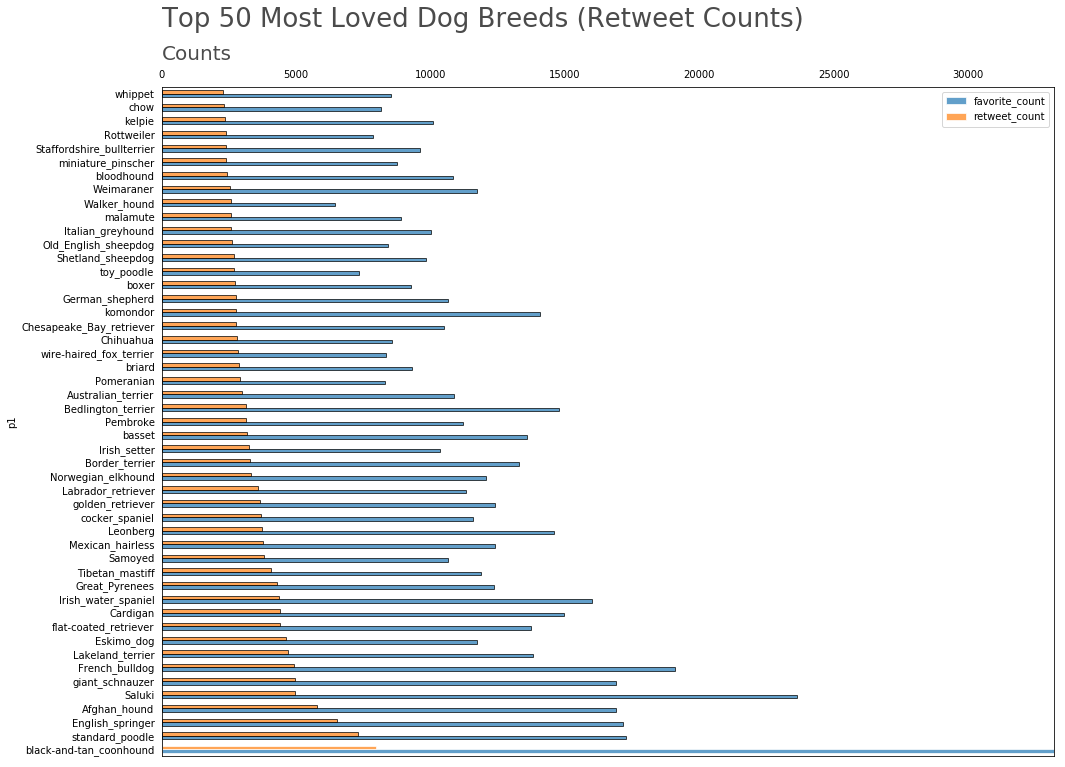

In [66]:
# Plot the Favorite Counts and Retweet Counts for top 50 most Retweeted breeds:
# Create a figure of given size
fig = plt.figure(figsize=(16,12))
# Add a subplot
ax = fig.add_subplot(111)

# Set title
ttl = 'Top 50 Most Loved Dog Breeds (Retweet Counts)'

# Set color transparency (0: transparent; 1: solid)
a = 0.7
# Create a colormap over 50 values


# Plot the 'favorite_count' column as horizontal bar plot
df_ret.plot(kind='barh', ax=ax, alpha=a, legend=True, 
                      edgecolor='w', xlim=(0,max(df_ret['favorite_count'])), title=ttl)

# Customize title, set position, allow space on top of plot for title
ax.set_title(ax.get_title(), fontsize=26, alpha=a, ha='left')
plt.subplots_adjust(top=0.9)
ax.title.set_position((0,1.08))

# Set x axis label on top of plot, set label text
ax.xaxis.set_label_position('top')
xlab = 'Counts'
ax.set_xlabel(xlab, fontsize=20, alpha=a, ha='left')
ax.xaxis.set_label_coords(0, 1.04)
 
# Position x tick labels on top
ax.xaxis.tick_top()
# Remove tick lines in x and y axes
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

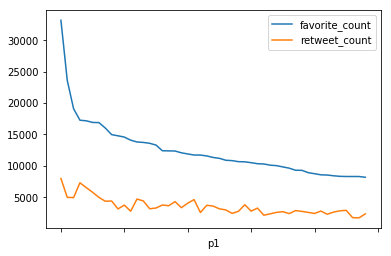

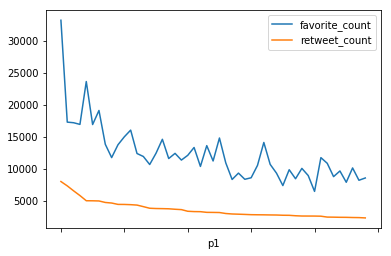

In [64]:
df_fav.plot()
df_ret.plot()

### More Vizzes!

For other data visualizations, see Tableau dashboard [here!](https://public.tableau.com/profile/lauren2923#!/vizhome/We_Rate_Dogs_Tweets/WeRateDogs-Tweets?publish=yes)
